In [86]:
import pandas as pd
df_june = pd.read_csv('June_processed_3column.csv', sep=";", dayfirst=True)
df_july = pd.read_csv('July_processed_3column.csv', sep=";",dayfirst=True)

In [87]:
import datetime
df_june['Date Time'] = pd.to_datetime(df_june['Date Time'], dayfirst=True)
df_july['Date Time'] = pd.to_datetime(df_july['Date Time'], dayfirst=True)

In [88]:
df_july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
Vehicle           2499 non-null object
Date Time         2499 non-null datetime64[ns]
total_duration    2499 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 58.6+ KB


In [89]:
df_june=df_june.drop_duplicates()

In [90]:
df_july=df_july.drop_duplicates()

In [91]:
df_july[df_july.duplicated(keep=False)]

,Vehicle,Date Time,total_duration


In [92]:
df_june[df_june.isnull().any(axis=1)]

,Vehicle,Date Time,total_duration


In [94]:
df_june

,Vehicle,Date Time,total_duration
0,KX14LUZ,2017-06-01 03:23:00,62
1,MX65CWV,2017-06-01 03:30:00,62
2,MX65CWY,2017-06-01 03:43:00,49
3,GN62BXK,2017-06-01 04:24:00,57
4,YP66ZNH,2017-06-01 04:33:00,9
5,BV63XBN,2017-06-01 04:38:00,57
6,KV64XMC,2017-06-01 04:53:00,49
7,BP66KKL,2017-06-01 04:55:00,65
8,KY63EEG,2017-06-01 05:02:00,64
9,KM65KOX,2017-06-01 05:10:00,125


At first, I handled the outlier values by checking the abnormal values (too high or low) and replaced those values with the average of the rest in the same column (in MS Excel). 

Outlier handling process is somewhat subjective. Not to delete any record (row), I sorted each column from highes to lowest and detected the outliers visually. Then I averaged the values which are within normal limits, and replaced the outliers with this average value. Then I saved the xlsx file as csv file and read it into to Python Pandas dataframe.

In [24]:
df_may = pd.read_csv('may_anpr.csv', sep=';', dayfirst=True, index_col=0)

In [25]:
df_may.head()

,Vehicle,Date Time,total_duration
0,KX14LUZ,03.05.2017 03:04,46
1,MX65CWV,03.05.2017 03:31,64
2,MX65CWY,03.05.2017 03:42,53
3,MX65CWW,03.05.2017 04:18,68
4,BV63XBN,03.05.2017 04:42,39


In [95]:
df_may[df_may.isnull().any(axis=1)]

,Vehicle,Date Time,total_duration


In [96]:
df=pd.concat([df_may,df_june, df_july])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 2498
Data columns (total 3 columns):
Vehicle           6643 non-null object
Date Time         6643 non-null object
total_duration    6643 non-null int64
dtypes: int64(1), object(2)
memory usage: 207.6+ KB


In [98]:
df

,Vehicle,Date Time,total_duration
0,KX14LUZ,03.05.2017 03:04,46
1,MX65CWV,03.05.2017 03:31,64
2,MX65CWY,03.05.2017 03:42,53
3,MX65CWW,03.05.2017 04:18,68
4,BV63XBN,03.05.2017 04:42,39
5,KM65KOX,03.05.2017 05:19,47
6,LT63UAG,03.05.2017 05:22,97
7,R600KST,03.05.2017 05:42,94
8,BP66KKH,03.05.2017 05:53,101
9,KX14NGJ,03.05.2017 06:06,81


In [99]:
df.to_csv("May_June_July_data_df.csv")

Then, I converted the “Date Time” column to Pandas DateTime64 format to process it.

In [100]:
import datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)

In [101]:
df[df.isnull().any(axis=1)]

,Vehicle,Date Time,total_duration


In [102]:
df.head()

,Vehicle,Date Time,total_duration
0,KX14LUZ,2017-05-03 03:04:00,46
1,MX65CWV,2017-05-03 03:31:00,64
2,MX65CWY,2017-05-03 03:42:00,53
3,MX65CWW,2017-05-03 04:18:00,68
4,BV63XBN,2017-05-03 04:42:00,39


Then I created two new columns as “Date” and “Time”, and assigned the date and time parts of DateTime to those columns (partioning the Date Time).

In [103]:
df['Date'] = pd.DatetimeIndex(df['Date Time']).date
df['Time'] = pd.DatetimeIndex(df['Date Time']).time

In [104]:
df.head()

,Vehicle,Date Time,total_duration,Date,Time
0,KX14LUZ,2017-05-03 03:04:00,46,2017-05-03,03:04:00
1,MX65CWV,2017-05-03 03:31:00,64,2017-05-03,03:31:00
2,MX65CWY,2017-05-03 03:42:00,53,2017-05-03,03:42:00
3,MX65CWW,2017-05-03 04:18:00,68,2017-05-03,04:18:00
4,BV63XBN,2017-05-03 04:42:00,39,2017-05-03,04:42:00


Then, I calculated the interarrival times (both time and min) by deriving the time differences from sequential arrivals.

In [105]:
new_Column=[]
temp=df['Date Time'].iloc[0]
for x in df['Date Time']:
    new_Column.append(abs(x-temp))
    temp=x

df['Arrival Interval']=new_Column
df['Arrival Interval_min']=df['Arrival Interval'].dt.components.hours*60+df['Arrival Interval'].dt.components.minutes

In [106]:
df.head()

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min
0,KX14LUZ,2017-05-03 03:04:00,46,2017-05-03,03:04:00,00:00:00,0
1,MX65CWV,2017-05-03 03:31:00,64,2017-05-03,03:31:00,00:27:00,27
2,MX65CWY,2017-05-03 03:42:00,53,2017-05-03,03:42:00,00:11:00,11
3,MX65CWW,2017-05-03 04:18:00,68,2017-05-03,04:18:00,00:36:00,36
4,BV63XBN,2017-05-03 04:42:00,39,2017-05-03,04:42:00,00:24:00,24


Arrival interval calculation might cause some problem for sunday and monday as the facility is closed for a certain time period. So, I have edited the relevant intervals manually in MS Excel and read the new csv again

df.to_csv("interval_for_edit_df.csv")

Then, I partioned the “Date” column into Year, Month, Week, Day and Hour.

In [108]:
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)
df['Day'] = df['Date'].map(lambda x: x.day)
df['day_of_week'] = df['Date Time'].dt.weekday_name
df['day_of_week_number'] = df['Date Time'].dt.weekday
df['arrival_hour'] = df['Date Time'].dt.hour

Then, I calculated the turnaround time interval of each arrival into three different parts : 0-45 min, 45-60 min and longer than 60 min; and I assigned the finding into new column named “Exit_within_45_60_min”. Next, I counted the each interval in the dataset and derived the numbers of each turnaround interval for each day.

In [109]:
temp=[]
for x in df["total_duration"]:
    if x<=45:
        temp.append("Exit within 45 min")
    elif (x>45 and x<=60):
        temp.append("Exit within 45-60 min")
    elif x>60:
        temp.append("Exit after 60 min")


df["Exit_within_45_60_min"]=temp

arrival_hour_by_day=[ ]

for x in range(0,7):
    arrival_hour_by_day.append(df[df['day_of_week_number']==x]['Exit_within_45_60_min'].value_counts())

In [110]:
df.describe()

,total_duration,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week_number,arrival_hour
count,6643.000000,6643,6643.000000,6643.0,6643.000000,6643.000000,6643.000000,6643.000000
mean,76.562698,0 days 00:20:20.809875,19.479753,2017.0,6.146922,16.438507,2.458979,10.214361
std,47.732591,0 days 01:15:31.339046,52.771955,0.0,0.834787,8.685041,1.707079,5.222954
min,0.000000,0 days 00:00:00,0.000000,2017.0,5.000000,1.000000,0.000000,0.000000
25%,50.000000,0 days 00:03:00,3.000000,2017.0,5.000000,8.000000,1.000000,6.000000
50%,71.000000,0 days 00:09:00,9.000000,2017.0,6.000000,17.000000,2.000000,10.000000
75%,99.000000,0 days 00:20:00,20.000000,2017.0,7.000000,24.000000,4.000000,13.000000
max,1169.000000,2 days 18:07:00,1126.000000,2017.0,8.000000,31.000000,6.000000,23.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 2498
Data columns (total 14 columns):
Vehicle                  6643 non-null object
Date Time                6643 non-null datetime64[ns]
total_duration           6643 non-null int64
Date                     6643 non-null object
Time                     6643 non-null object
Arrival Interval         6643 non-null timedelta64[ns]
Arrival Interval_min     6643 non-null int64
Year                     6643 non-null int64
Month                    6643 non-null int64
Day                      6643 non-null int64
day_of_week              6643 non-null object
day_of_week_number       6643 non-null int64
arrival_hour             6643 non-null int64
Exit_within_45_60_min    6643 non-null object
dtypes: datetime64[ns](1), int64(7), object(5), timedelta64[ns](1)
memory usage: 778.5+ KB


In [113]:
arrival_hour_by_day[6]

Exit after 60 min        148
Exit within 45 min       117
Exit within 45-60 min     77
Name: Exit_within_45_60_min, dtype: int64

In [114]:
df

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min
0,KX14LUZ,2017-05-03 03:04:00,46,2017-05-03,03:04:00,00:00:00,0,2017,5,3,Wednesday,2,3,Exit within 45-60 min
1,MX65CWV,2017-05-03 03:31:00,64,2017-05-03,03:31:00,00:27:00,27,2017,5,3,Wednesday,2,3,Exit after 60 min
2,MX65CWY,2017-05-03 03:42:00,53,2017-05-03,03:42:00,00:11:00,11,2017,5,3,Wednesday,2,3,Exit within 45-60 min
3,MX65CWW,2017-05-03 04:18:00,68,2017-05-03,04:18:00,00:36:00,36,2017,5,3,Wednesday,2,4,Exit after 60 min
4,BV63XBN,2017-05-03 04:42:00,39,2017-05-03,04:42:00,00:24:00,24,2017,5,3,Wednesday,2,4,Exit within 45 min
5,KM65KOX,2017-05-03 05:19:00,47,2017-05-03,05:19:00,00:37:00,37,2017,5,3,Wednesday,2,5,Exit within 45-60 min
6,LT63UAG,2017-05-03 05:22:00,97,2017-05-03,05:22:00,00:03:00,3,2017,5,3,Wednesday,2,5,Exit after 60 min
7,R600KST,2017-05-03 05:42:00,94,2017-05-03,05:42:00,00:20:00,20,2017,5,3,Wednesday,2,5,Exit after 60 min
8,BP66KKH,2017-05-03 05:53:00,101,2017-05-03,05:53:00,00:11:00,11,2017,5,3,Wednesday,2,5,Exit after 60 min
9,KX14NGJ,2017-05-03 06:06:00,81,2017-05-03,06:06:00,00:13:00,13,2017,5,3,Wednesday,2,6,Exit after 60 min


Arrival interval calculation might cause some problem for Saturday and Sunday as the facility is closed for a certain time period. So, I have edited the relevant intervals manually in MS Excel and read the new csv again.. (changing the first arrival intervals of sundays to zero)

In [116]:
df.to_csv("May_June_July_processed for analysis.csv")

# Analysis part

Since we combined 3 months of data into single dataframe, there are 2 un-reasonable interarrival time in the whole dataset (last arrival of a month may not be compatible with the first arrival of the next month).. so I handled those outliers manually by editing the csv file...then I read the csv file into dataframe again for further analysis

In [94]:
import pandas as pd
df= pd.read_csv('May_June_July_processed for analysis.csv', sep=";", dayfirst=True)

Then I created a new data frame (df3) and assigned it to the countings. Next, I renamed the indexes as day names and plotted "Trucks Departure Analysis" chart.

In [95]:
import datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 14 columns):
Vehicle                  6643 non-null object
Date Time                6643 non-null datetime64[ns]
total_duration           6643 non-null int64
Date                     6643 non-null object
Time                     6643 non-null object
Arrival Interval         6643 non-null object
Arrival Interval_min     6643 non-null int64
Year                     6643 non-null int64
Month                    6643 non-null int64
Day                      6643 non-null int64
day_of_week              6643 non-null object
day_of_week_number       6643 non-null int64
arrival_hour             6643 non-null int64
Exit_within_45_60_min    6643 non-null object
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 726.7+ KB


In [110]:
# dropping the August values
df=df[:6427]


In [111]:
arrival_hour_by_day=[ ]

for x in range(0,7):
    arrival_hour_by_day.append(df[df['day_of_week_number']==x]['Exit_within_45_60_min'].value_counts())

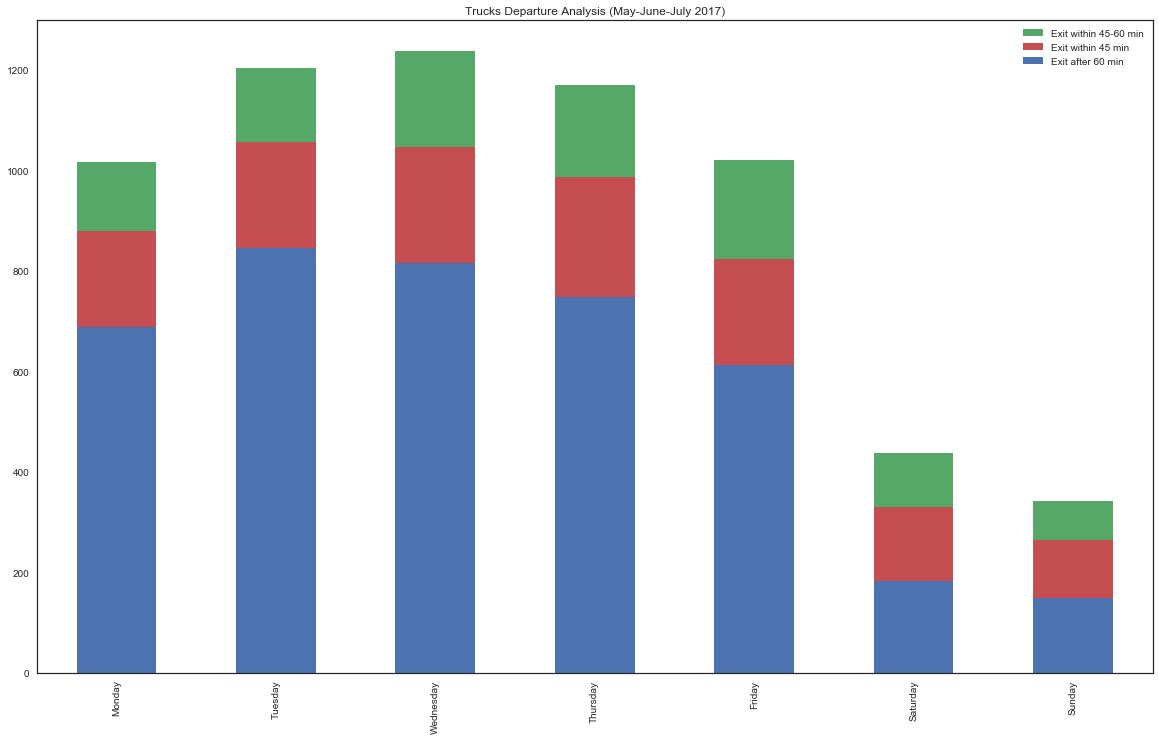

In [126]:
%matplotlib inline

df3 = pd.DataFrame(arrival_hour_by_day)

df3.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df3.plot(kind='bar',stacked=True,color=["b","r","g"], title="Trucks Departure Analysis (May-June-July 2017)", sort_columns=True, legend='reverse', figsize=(20,12))


In [128]:
exit_after_60=0
exit_within_45=0
exit_within_45_60=0

for x in arrival_hour_by_day:
    exit_after_60+=x[0]
    exit_within_45+=x[1]
    exit_within_45_60+=x[2]


In [130]:
exit_within_45

1345

In [131]:
exit_after_60

4041

In [132]:
exit_within_45_60

1041

In [127]:
df3

,Exit after 60 min,Exit within 45 min,Exit within 45-60 min
Monday,689,190,138
Tuesday,846,211,146
Wednesday,816,230,191
Thursday,748,238,185
Friday,612,211,197
Saturday,182,148,107
Sunday,148,117,77


Then I followed the same approach for calculating the turnaround times in 3-hour intervals and plotted the "Trucks Departure (Time Period) Analysis" chart.

In [121]:
df.head()

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min
0,KX14LUZ,03.05.2017 03:04,46,03.05.2017,03:04:00,0 days 00:00:00.000000000,0,2017,5,3,Wednesday,2,3,Exit within 45-60 min
1,MX65CWV,03.05.2017 03:31,64,03.05.2017,03:31:00,0 days 00:27:00.000000000,27,2017,5,3,Wednesday,2,3,Exit after 60 min
2,MX65CWY,03.05.2017 03:42,53,03.05.2017,03:42:00,0 days 00:11:00.000000000,11,2017,5,3,Wednesday,2,3,Exit within 45-60 min
3,MX65CWW,03.05.2017 04:18,68,03.05.2017,04:18:00,0 days 00:36:00.000000000,36,2017,5,3,Wednesday,2,4,Exit after 60 min
4,BV63XBN,03.05.2017 04:42,39,03.05.2017,04:42:00,0 days 00:24:00.000000000,24,2017,5,3,Wednesday,2,4,Exit within 45 min


Then I followed the same approach for calculating the turnaround times in 3-hour intervals and plotted the "Trucks Departure (Time Period) Analysis" chart.

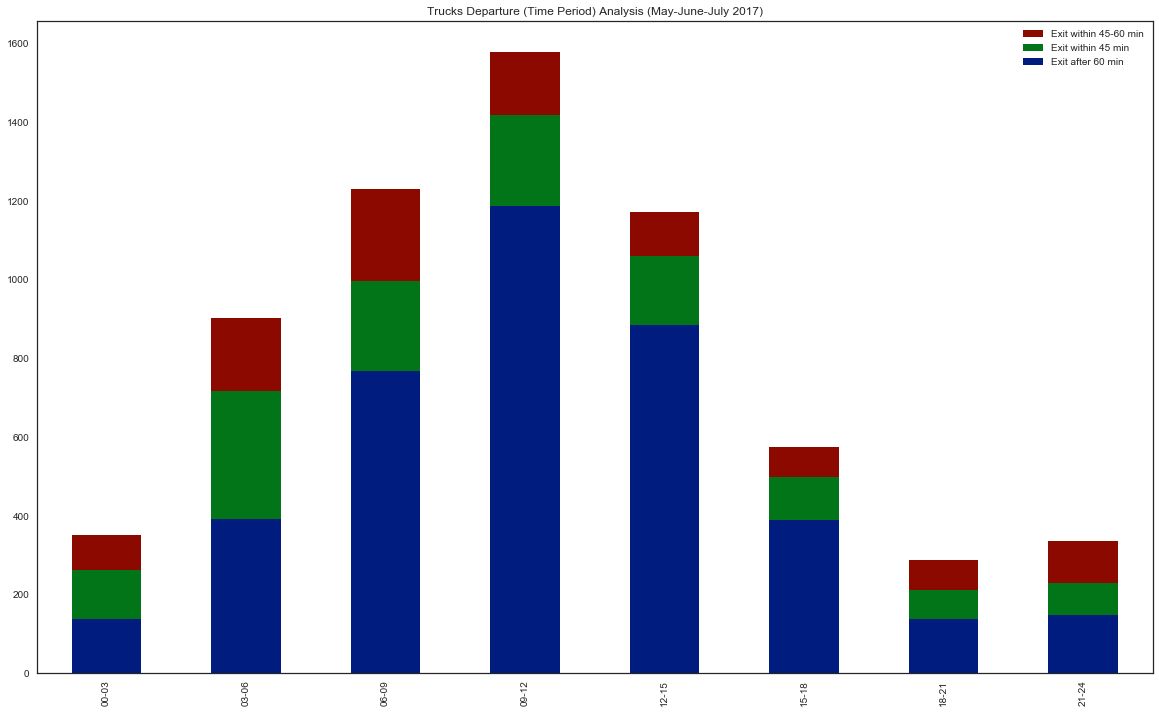

In [133]:
arrival_hour_by_period=[]

a = [0,3,6,9,12,15,18,21]

for x in a:
    arrival_hour_by_period.append(df[df['arrival_hour']==x]['Exit_within_45_60_min'].value_counts()+df[df['arrival_hour']==(x+1)]['Exit_within_45_60_min'].value_counts()+df[df['arrival_hour']==(x+2)]['Exit_within_45_60_min'].value_counts())


df4 = pd.DataFrame(arrival_hour_by_period)

df4.index = ['00-03','03-06','06-09','09-12','12-15','15-18','18-21','21-24']

df4.plot(kind='bar',stacked=True,title="Trucks Departure (Time Period) Analysis (May-June-July 2017)",  legend='reverse',figsize=(20,12))


In [134]:
df4

,Exit after 60 min,Exit within 45 min,Exit within 45-60 min
00-03,138,123,89
03-06,392,324,186
06-09,768,228,233
09-12,1185,231,162
12-15,884,176,111
15-18,389,108,78
18-21,137,74,76
21-24,148,81,106


Then I created a new column named “departure_time” by summing up the “Date Time” and “total_duration” columns. Next, I derived the ‘hour’ parts of departure times and assigned it to new column named “departure_hour”. 

In [135]:
from datetime import timedelta

df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)

temp=[]
for x,y in  zip(df["Date Time"],df["total_duration"]):
    temp.append(x+timedelta(minutes=float(y)))

df["departure_time"]=temp
df["departure_hour"]=df["departure_time"].map(lambda x: x.hour)

In [19]:
df.head()

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min,departure_time,departure_hour
0,KX14LUZ,2017-05-03 03:04:00,46,03.05.2017,03:04:00,0 days 00:00:00.000000000,0,2017,5,3,Wednesday,2,3,Exit within 45-60 min,2017-05-03 03:50:00,3
1,MX65CWV,2017-05-03 03:31:00,64,03.05.2017,03:31:00,0 days 00:27:00.000000000,27,2017,5,3,Wednesday,2,3,Exit after 60 min,2017-05-03 04:35:00,4
2,MX65CWY,2017-05-03 03:42:00,53,03.05.2017,03:42:00,0 days 00:11:00.000000000,11,2017,5,3,Wednesday,2,3,Exit within 45-60 min,2017-05-03 04:35:00,4
3,MX65CWW,2017-05-03 04:18:00,68,03.05.2017,04:18:00,0 days 00:36:00.000000000,36,2017,5,3,Wednesday,2,4,Exit after 60 min,2017-05-03 05:26:00,5
4,BV63XBN,2017-05-03 04:42:00,39,03.05.2017,04:42:00,0 days 00:24:00.000000000,24,2017,5,3,Wednesday,2,4,Exit within 45 min,2017-05-03 05:21:00,5


Then I designed an algorithm producing the number of trucks standing at each time interval (hour). In the algorithm, when a truck arrives to the facility, it checks whether there is any other truck that arrived but didn’t exit the facility before its (new arriving truck) arrival, and the number of trucks inside the facility is counted and entered in a new column named “trucks_standing” . So, for each arrival, there is a column showing the number of trucks already in the facility (including the arriving truck). That is, the arrival time of each arrival is compared to the departure time of previous arrivals and the sum is assigned to a new column.

In [136]:
temp=[ ]
temp2=df["departure_time"]

outer_loop=0
inner_loop=0

for x in df["Date Time"]:
    count=1
  
    for y in temp2:   
        
        if inner_loop<outer_loop:
            
            if (y>x):
                count+=1
                
            inner_loop+=1  
        else:
            inner_loop=0
            break  # break for inner loop
        
    outer_loop+=1
    
    temp.append(count)

df["trucks_standing"]=temp


In [21]:
df

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min,departure_time,departure_hour,trucks_standing
0,KX14LUZ,2017-05-03 03:04:00,46,03.05.2017,03:04:00,0 days 00:00:00.000000000,0,2017,5,3,Wednesday,2,3,Exit within 45-60 min,2017-05-03 03:50:00,3,1
1,MX65CWV,2017-05-03 03:31:00,64,03.05.2017,03:31:00,0 days 00:27:00.000000000,27,2017,5,3,Wednesday,2,3,Exit after 60 min,2017-05-03 04:35:00,4,2
2,MX65CWY,2017-05-03 03:42:00,53,03.05.2017,03:42:00,0 days 00:11:00.000000000,11,2017,5,3,Wednesday,2,3,Exit within 45-60 min,2017-05-03 04:35:00,4,3
3,MX65CWW,2017-05-03 04:18:00,68,03.05.2017,04:18:00,0 days 00:36:00.000000000,36,2017,5,3,Wednesday,2,4,Exit after 60 min,2017-05-03 05:26:00,5,3
4,BV63XBN,2017-05-03 04:42:00,39,03.05.2017,04:42:00,0 days 00:24:00.000000000,24,2017,5,3,Wednesday,2,4,Exit within 45 min,2017-05-03 05:21:00,5,2
5,KM65KOX,2017-05-03 05:19:00,47,03.05.2017,05:19:00,0 days 00:37:00.000000000,37,2017,5,3,Wednesday,2,5,Exit within 45-60 min,2017-05-03 06:06:00,6,3
6,LT63UAG,2017-05-03 05:22:00,97,03.05.2017,05:22:00,0 days 00:03:00.000000000,3,2017,5,3,Wednesday,2,5,Exit after 60 min,2017-05-03 06:59:00,6,3
7,R600KST,2017-05-03 05:42:00,94,03.05.2017,05:42:00,0 days 00:20:00.000000000,20,2017,5,3,Wednesday,2,5,Exit after 60 min,2017-05-03 07:16:00,7,3
8,BP66KKH,2017-05-03 05:53:00,101,03.05.2017,05:53:00,0 days 00:11:00.000000000,11,2017,5,3,Wednesday,2,5,Exit after 60 min,2017-05-03 07:34:00,7,4
9,KX14NGJ,2017-05-03 06:06:00,81,03.05.2017,06:06:00,0 days 00:13:00.000000000,13,2017,5,3,Wednesday,2,6,Exit after 60 min,2017-05-03 07:27:00,7,4


Then, I calculated the average and maximum numbers of trucks standing for each day of week within entire dataset and assigned those values to a new data frame. Next, I plotted the "'Number of Trucks Standing per Day'" chart.

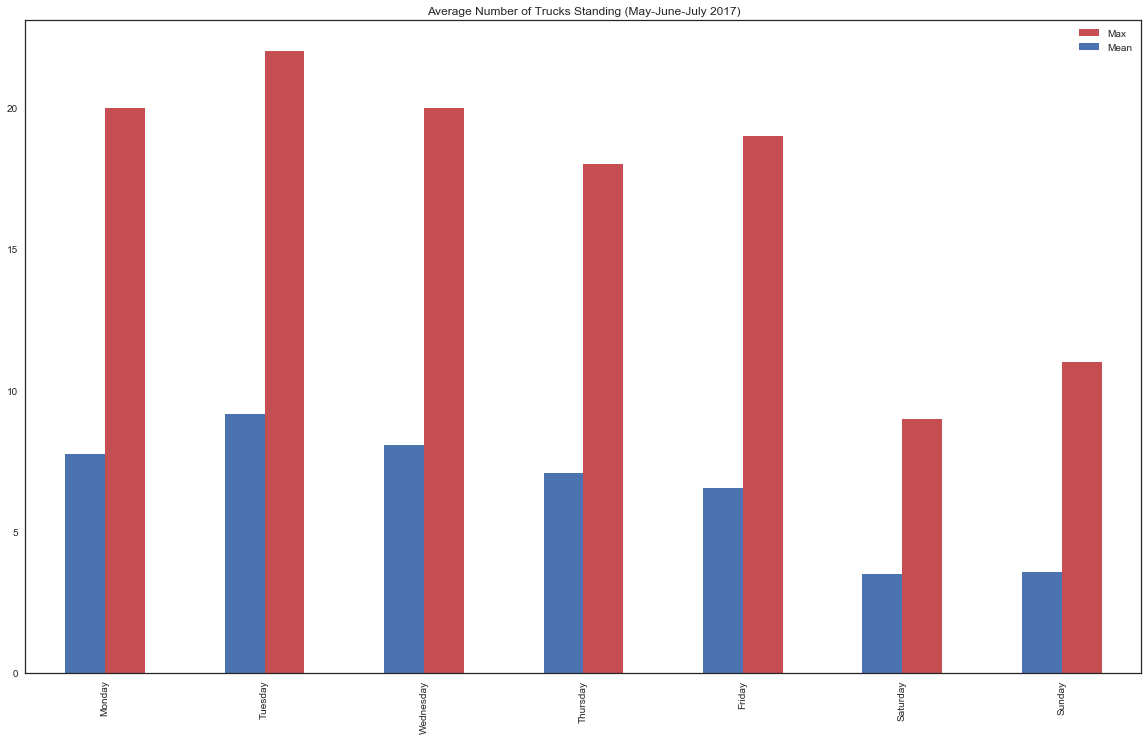

In [139]:
trucks_standing_mean=[ ]
trucks_standing_max=[ ]

for x in range(0,7):
    trucks_standing_mean.append(df[df["day_of_week_number"]==x]["trucks_standing"].mean())
    trucks_standing_max.append(df[df["day_of_week_number"]==x]["trucks_standing"].max())

df5=pd.DataFrame(list(map(list, zip(trucks_standing_mean,trucks_standing_max))))
    
df5.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df5.columns = ['Mean', 'Max']

df5.plot(kind='bar', color=["b","r"],stacked=False, title="Average Number of Trucks Standing (May-June-July 2017)", legend='reverse', figsize=(20,12))


In [140]:
df.to_csv("May_June_July_for analysis step-2.csv")

In [3]:
import pandas as pd
data= pd.read_csv('May_June_July_for analysis step-2.csv', sep=",", dayfirst=True)

In [5]:
data['arrival_hour'].value_counts()

10    556
11    539
6     489
12    488
9     483
5     436
8     389
13    370
7     351
14    313
4     263
15    243
3     203
16    193
17    139
2     133
23    120
0     116
18    114
22    112
21    103
1     101
19     91
20     82
Name: arrival_hour, dtype: int64

In [1]:
import pandas as pd
df=pd.read_csv("May_June_July_for analysis step-2.csv",sep=",", dayfirst=True, index_col=0)
df.tail()


,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min,departure_time,departure_hour,trucks_standing
6422,RX66MVE,2017-07-31 22:44:00,45,31.07.2017,22:44:00,0 days 00:09:00.000000000,9,2017,7,31,Monday,0,22,Exit within 45 min,2017-07-31 23:29:00,23,4
6423,BV63XBN,2017-07-31 22:59:00,61,31.07.2017,22:59:00,0 days 00:15:00.000000000,15,2017,7,31,Monday,0,22,Exit after 60 min,2017-08-01 00:00:00,0,4
6424,KU13ACY,2017-07-31 23:07:00,47,31.07.2017,23:07:00,0 days 00:08:00.000000000,8,2017,7,31,Monday,0,23,Exit within 45-60 min,2017-07-31 23:54:00,23,4
6425,GF13BKD,2017-07-31 23:15:00,95,31.07.2017,23:15:00,0 days 00:08:00.000000000,8,2017,7,31,Monday,0,23,Exit after 60 min,2017-08-01 00:50:00,0,5
6426,MX17DZT,2017-07-31 23:35:00,52,31.07.2017,23:35:00,0 days 00:20:00.000000000,20,2017,7,31,Monday,0,23,Exit within 45-60 min,2017-08-01 00:27:00,0,5


In [3]:
df.shape

(6427, 17)

In [4]:
df['Vehicle'].value_counts().to_csv("Vehcile frequency.csv")

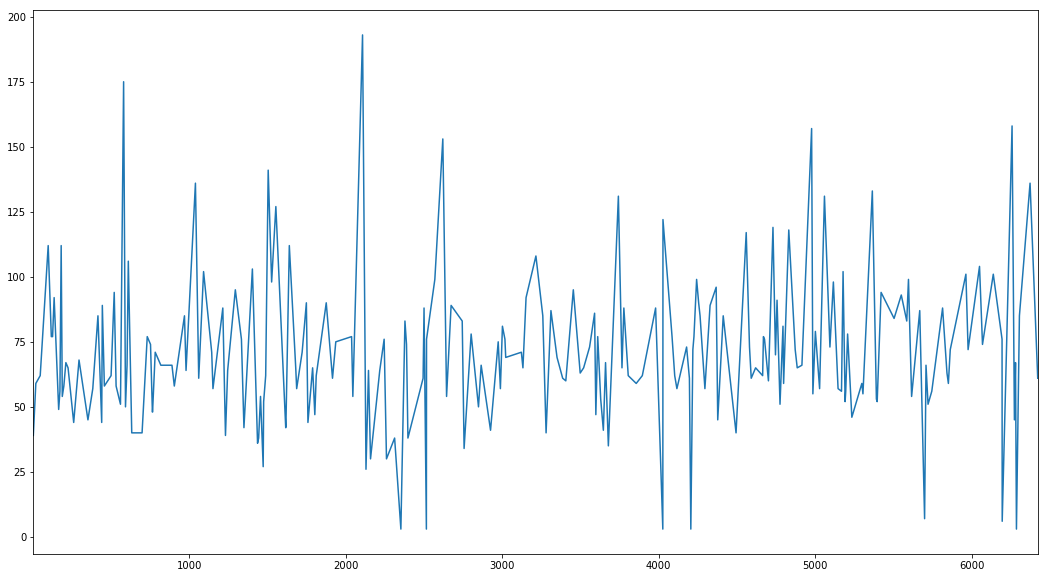

In [13]:
%matplotlib inline
df[df["Vehicle"]=="BV63XBN"]["total_duration"].plot(figsize=(18,10))

In [25]:
df[df["Vehicle"]=="BV63XBN"]["Date Time"].to_csv("bv63xbn_time_analysis.csv")

Then I summarized the values for day of week, arrival hour and trucks standing in a new data frame (df6). Next, I calculated the average number of trucks standing at each hour (0..23) for each day of week (NaN values are replaced with zeros). Now I have a data frame containing an average number of trucks arriving at each hour on each day of week. Next, I plotted the whole table with MS Excel line chart.

In [142]:
df6=pd.DataFrame(
    {'Day': df ["day_of_week"],'hour': df ["arrival_hour"],'number': df["trucks_standing"]})

groups = dict(list(df6.groupby(['Day'])))

df_1=groups['Monday'].groupby(['hour']).mean()
df_2=groups['Tuesday'].groupby(['hour']).mean()
df_3=groups['Wednesday'].groupby(['hour']).mean()
df_4=groups['Thursday'].groupby(['hour']).mean()
df_5=groups['Friday'].groupby(['hour']).mean()
df_6=groups['Saturday'].groupby(['hour']).mean()
df_7=groups['Sunday'].groupby(['hour']).mean()

df7=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7], axis=1)

df7.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df7 = df7.fillna(0)

df7=df7.round(2)

df7

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,1.80,2.40,2.47,3.12,2.26,2.72,1.00
1,1.33,2.27,2.33,3.12,2.21,2.18,0.00
2,1.62,3.54,3.50,3.32,2.69,2.00,1.00
3,2.40,3.77,3.17,3.15,3.02,1.70,1.00
4,3.65,5.54,4.47,4.16,3.80,2.14,1.00
5,4.30,4.83,5.40,5.02,4.75,2.93,1.91
6,7.77,6.87,7.39,7.88,6.07,2.68,4.24
7,8.15,8.92,8.22,8.85,6.48,4.08,3.50
8,6.34,7.85,7.48,6.56,6.90,4.51,1.73


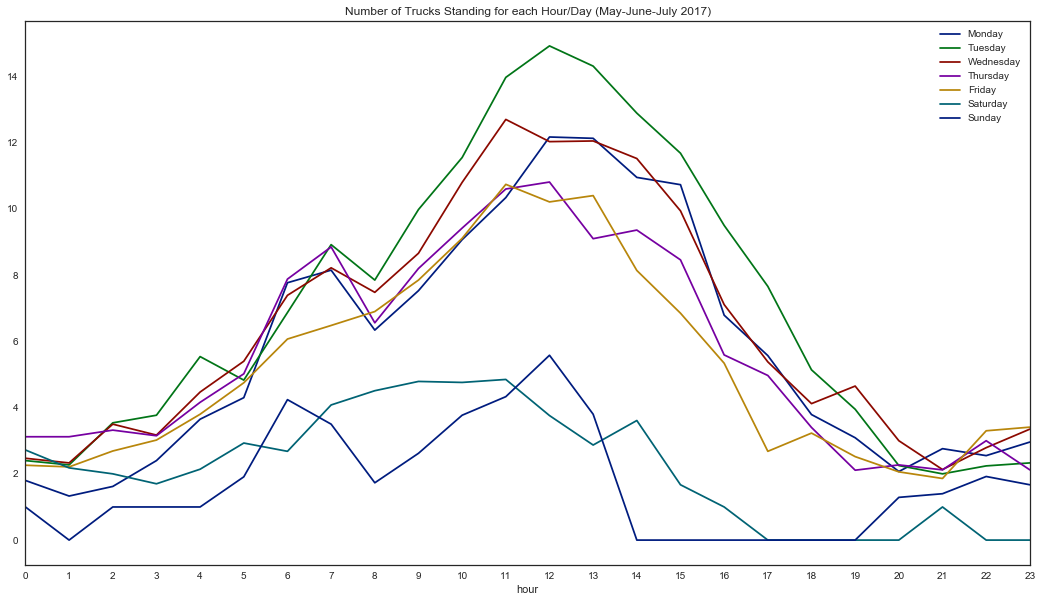

In [143]:
ticks=range(0,24)

df7.plot(title="Number of Trucks Standing for each Hour/Day (May-June-July 2017)", figsize=(18,10), xticks=ticks)

Then I created two new data frames containing the average number of trucks standing and average duration (TTT) (converted to hour by dividing 60) at each hour for entire data set. Next, I calculated the number of each unique hour (0..23) in “arrival_hour” and “departure_hour” columns, then divided the numbers by 94 (there are 94 days in data set, May 03-Aug 04) to get the average number of arrivals and departures at each hour in entire data set. To summarize all the values in a table, I concatenated the four frames into a single data frame named “df_summary” and plotted the table (column by column) in MS Excel line chart (by manually copying the data frame values to the excel).

In [144]:
mean_standing=[ ]
mean_duration=[ ]
mean_arrival=[ ]
mean_departure=[ ]

for x in range(0,24):
    mean_standing.append(df[df["arrival_hour"] == x]["trucks_standing"].mean())
    mean_duration.append(df[df["arrival_hour"] == x]["total_duration"].mean())
    
    
mean_arrival=df.groupby(['arrival_hour']).size()
mean_departure=df.groupby(['departure_hour']).size()
    
import numpy as np

ind=np.arange(0,24)   

mean_duration=np.array(mean_duration)
mean_standing=np.array(mean_standing)
mean_arrival=np.array(mean_arrival)
mean_departure=np.array(mean_departure)
    


In [28]:
mean_arrival

array([120, 106, 140, 206, 270, 450, 497, 373, 403, 494, 570, 557, 499,
       381, 328, 249, 198, 143, 121, 101,  86, 105, 117, 129], dtype=int64)

In [29]:
mean_standing

array([  2.525     ,   2.46226415,   3.06428571,   2.97572816,
         4.09259259,   4.50222222,   6.6861167 ,   7.91152815,
         6.90818859,   7.85020243,   9.46491228,  10.82226212,
        11.51703407,  11.09973753,  10.45121951,   9.7751004 ,
         7.09090909,   5.59440559,   4.38842975,   4.37623762,
         2.34883721,   2.1047619 ,   2.67521368,   3.17054264])

In [145]:
df_mean_standing=pd.DataFrame(data=mean_standing, index=ind, columns=["mean_standing"])
df_mean_duration=pd.DataFrame(data=mean_duration, index=ind, columns=["mean_duration"])
df_mean_arrival= pd.DataFrame(data=mean_arrival/90, index=ind, columns=["mean_arrival"])
df_mean_departure= pd.DataFrame(data=mean_departure/90, index=ind, columns=["mean_departure"])

df_summary=pd.concat([df_mean_arrival, df_mean_departure, df_mean_standing, df_mean_duration], axis=1)
df_summary=df_summary.round(2)

df_summary

,mean_arrival,mean_departure,mean_standing,mean_duration
0,1.29,1.36,2.54,54.60
1,1.12,1.40,2.42,55.05
2,1.48,0.93,3.00,59.92
3,2.26,1.49,2.98,59.98
4,2.92,2.43,4.11,59.08
5,4.84,4.44,4.53,50.07
6,5.43,2.51,6.66,82.62
7,3.90,5.03,7.46,74.38
8,4.32,3.89,6.60,73.59
9,5.37,4.47,7.86,80.08


In [146]:
df_summary.to_csv("Transfaction_df_summary_May_June_July.csv")
df_summary

,mean_arrival,mean_departure,mean_standing,mean_duration
0,1.29,1.36,2.54,54.60
1,1.12,1.40,2.42,55.05
2,1.48,0.93,3.00,59.92
3,2.26,1.49,2.98,59.98
4,2.92,2.43,4.11,59.08
5,4.84,4.44,4.53,50.07
6,5.43,2.51,6.66,82.62
7,3.90,5.03,7.46,74.38
8,4.32,3.89,6.60,73.59
9,5.37,4.47,7.86,80.08


Next, I plotted a chart showing average numbers of trucks per arrival, departure and standing in the same graph to see the relationships and interactions between those parameters.

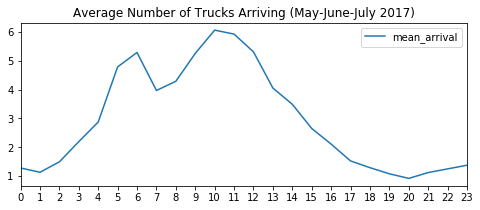

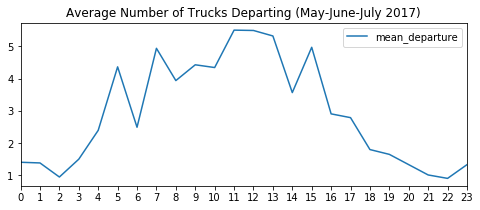

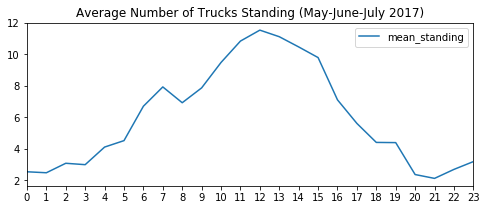

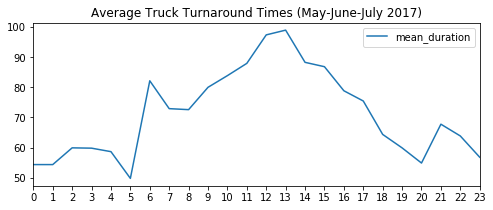

In [32]:
%matplotlib inline
ticks=range(0,24)
df_mean_arrival.plot(title="Average Number of Trucks Arriving (May-June-July 2017)", figsize=(8,3),xticks=ticks)
df_mean_departure.plot(title="Average Number of Trucks Departing (May-June-July 2017)", figsize=(8,3),xticks=ticks)
df_mean_standing.plot(title="Average Number of Trucks Standing (May-June-July 2017)", figsize=(8,3),xticks=ticks)
df_mean_duration.plot(title="Average Truck Turnaround Times (May-June-July 2017)", figsize=(8,3),xticks=ticks)

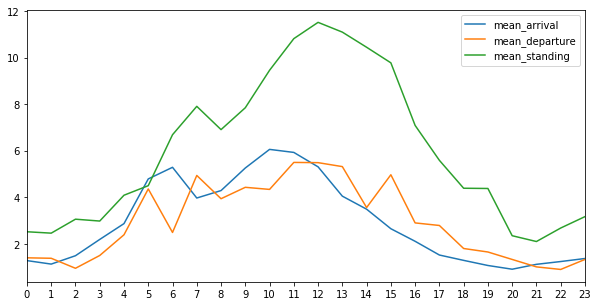

In [33]:
df_summary.loc[:,['mean_arrival','mean_departure','mean_standing']].plot(figsize=(10,5), xticks=ticks)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F7BCB00>]], dtype=object)

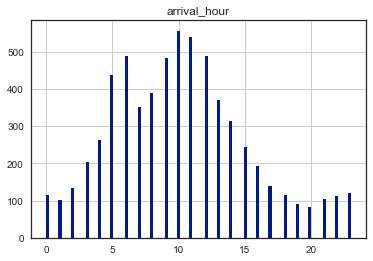

In [147]:
df.hist('arrival_hour',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF60780>]], dtype=object)

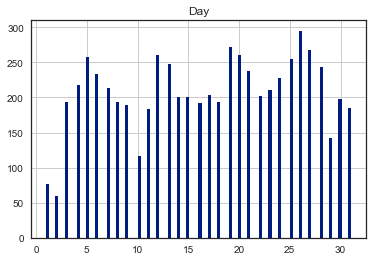

In [148]:
df.hist('Day',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D970D68>]], dtype=object)

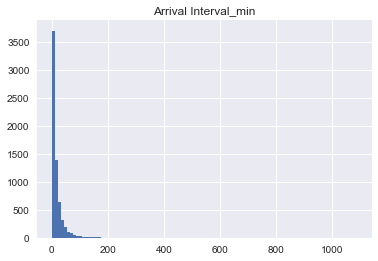

In [147]:
df.hist('Arrival Interval_min',bins=100)

In [148]:
df.describe()

,total_duration,Arrival Interval_min,Year,Month,Day,day_of_week_number,arrival_hour,departure_hour,trucks_standing
count,6643.000000,6643.000000,6643.0,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000
mean,76.562698,17.829445,2017.0,6.146922,16.438507,2.458979,10.214361,11.025139,7.414722
std,47.732591,37.526985,0.0,0.834787,8.685041,1.707079,5.222954,5.278067,4.686891
min,0.000000,0.000000,2017.0,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.000000,3.000000,2017.0,5.000000,8.000000,1.000000,6.000000,7.000000,4.000000
50%,71.000000,9.000000,2017.0,6.000000,17.000000,2.000000,10.000000,11.000000,6.000000
75%,99.000000,20.000000,2017.0,7.000000,24.000000,4.000000,13.000000,15.000000,11.000000
max,1169.000000,1087.000000,2017.0,8.000000,31.000000,6.000000,23.000000,23.000000,28.000000


In [9]:
df_TTT=df.groupby(["Day"])["total_duration"].mean()


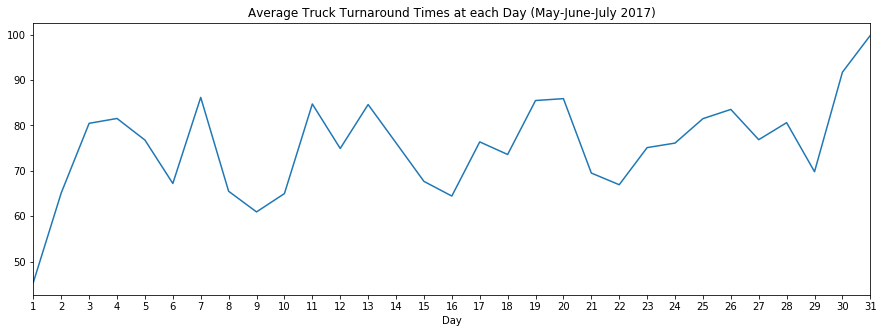

In [12]:
%matplotlib inline
df_TTT.plot(title="Average Truck Turnaround Times at each Day (May-June-July 2017)", figsize=(15,5), xticks=range(1,32))

In [13]:
df_TTT

Day
1     45.428571
2     65.135593
3     80.461140
4     81.527523
5     76.779070
6     67.222222
7     86.168224
8     65.500000
9     60.957672
10    64.991453
11    84.715847
12    74.923077
13    84.595142
14    76.160000
15    67.681592
16    64.447917
17    76.372549
18    73.601036
19    85.481618
20    85.892308
21    69.512605
22    66.940594
23    75.114286
24    76.110132
25    81.486275
26    83.522034
27    76.857678
28    80.604938
29    69.809859
30    91.712121
31    99.827027
Name: total_duration, dtype: float64

In [ ]:
df_TRT.plot(title="Average Truck Turnaround Times for weekdays each Day (May-June-July 2017)", figsize=(15,5), xticks=range(1,32))
df_TRT=df.groupby(["Day"])["total_duration"].mean()

# Now I'll produce some additional charts for TTT vs days

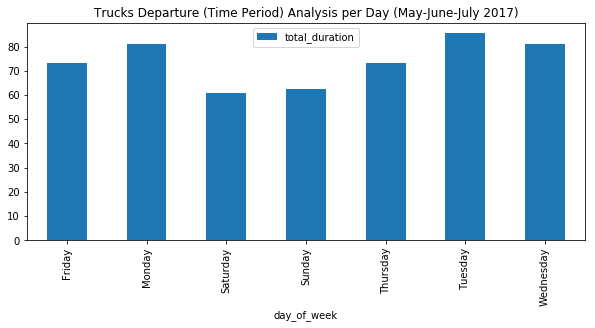

In [14]:
%matplotlib inline
df_daily_TTT=df.groupby(["day_of_week"])["total_duration"].mean()

df_daily_TTT.plot(kind='bar',title="Trucks Departure (Time Period) Analysis per Day (May-June-July 2017)",  legend=True,figsize=(10,4))

In [15]:
df_daily_TTT

day_of_week
Friday       73.412745
Monday       81.196657
Saturday     60.675057
Sunday       62.309942
Thursday     73.223740
Tuesday      85.469659
Wednesday    81.038804
Name: total_duration, dtype: float64

# chart-9: wasted/idle time

In [17]:
df_summary=pd.read_csv("Transfaction_df_summary_May_June_July.csv", index_col=0)
df_summary.head()


,mean_arrival,mean_departure,mean_standing,mean_duration
0,1.29,1.36,2.54,54.60
1,1.12,1.40,2.42,55.05
2,1.48,0.93,3.00,59.92
3,2.26,1.49,2.98,59.98
4,2.92,2.43,4.11,59.08


In [18]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 4 columns):
mean_arrival      24 non-null float64
mean_departure    24 non-null float64
mean_standing     24 non-null float64
mean_duration     24 non-null float64
dtypes: float64(4)
memory usage: 960.0 bytes


In [19]:
df_waiting=pd.DataFrame(abs(df_summary["mean_duration"]-df_summary["mean_duration"]/df_summary["mean_standing"]), columns=["mean_idle"])

In [20]:
df_wasted=pd.concat([df_waiting,df_summary["mean_duration"]], axis=1)

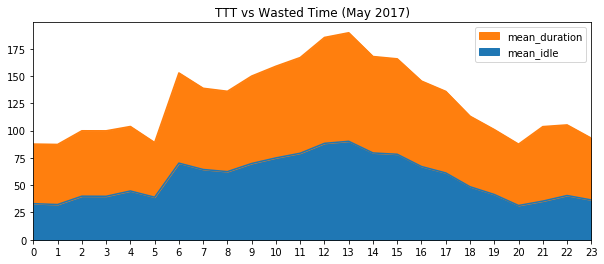

In [21]:
ticks=range(0,24)

df_wasted.plot(kind='area', title="TTT vs Wasted Time (May 2017)", legend='reverse',figsize=(10,4), xticks=ticks)

I'll try the inital idle formula below.. but it won't work

# chart-10: Plant Utilization

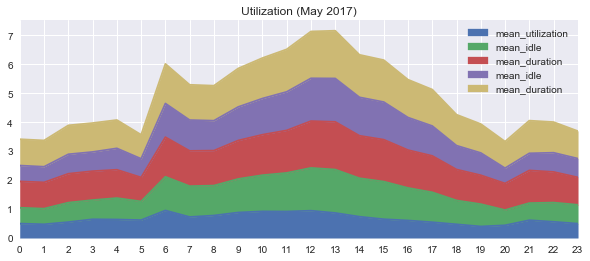

In [157]:
df_util=pd.DataFrame((df_summary["mean_arrival"]*df_summary["mean_duration"])/(1+df_summary["mean_arrival"]+df_summary["mean_standing"]), 
                      columns=["mean_utilization"])
df_util=pd.concat([df_util,df_wasted,df_waiting,df_summary["mean_duration"]], axis=1)
df_util.plot(kind='area', title="Utilization (May 2017)", figsize=(10,4), xticks=ticks)

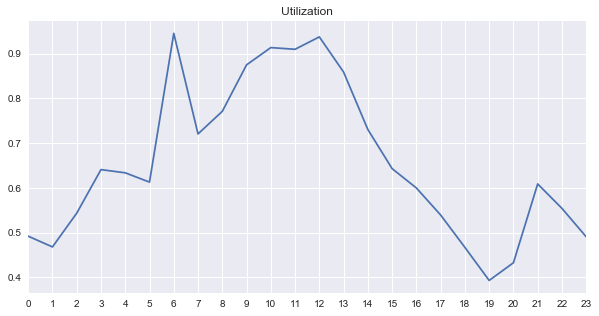

In [158]:
df_util["mean_utilization"].plot(title="Utilization", figsize=(10,5),xticks=ticks)

In [159]:
df_util

,mean_utilization,mean_idle,mean_duration,mean_idle,mean_duration
0,0.491828,0.548889,0.91,0.548889,0.91
1,0.467781,0.540081,0.91,0.540081,0.91
2,0.543307,0.673203,1.00,0.673203,1.00
3,0.640794,0.664430,1.00,0.664430,1.00
4,0.633597,0.740391,0.98,0.740391,0.98
5,0.612826,0.645556,0.83,0.645556,0.83
6,0.945703,1.165217,1.37,1.165217,1.37
7,0.720680,1.065765,1.22,1.065765,1.22
8,0.771160,1.034891,1.21,1.034891,1.21
9,0.875189,1.160573,1.33,1.160573,1.33


utilization vs.2

In [160]:
util=df_summary["mean_standing"]/(1+df_summary["mean_standing"])
#df_util_v2=pd.DataFrame(util, columns=["mean_utilization"])
#df_util_v2=pd.concat([df_util_v2,df_wasted,df_waiting,df_summary["mean_duration"]], axis=1)
df_util=pd.concat([util,df_wasted,df_waiting,df_summary["mean_duration"]], axis=1)
util

0     0.715909
1     0.710983
2     0.753695
3     0.748744
4     0.803536
5     0.818182
6     0.869961
7     0.887767
8     0.873578
9     0.887006
10    0.904398
11    0.915398
12    0.920128
13    0.917355
14    0.912664
15    0.907236
16    0.876391
17    0.848255
18    0.814471
19    0.814126
20    0.701493
21    0.677419
22    0.728261
23    0.760192
Name: mean_standing, dtype: float64

In [161]:
df_utilization=pd.DataFrame(util)

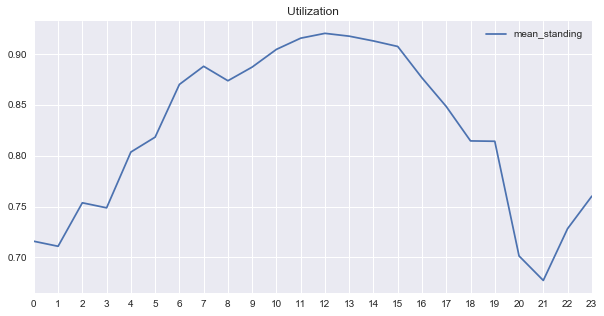

In [162]:
df_utilization.plot(title="Utilization", figsize=(10,5),xticks=ticks)

# chart-11: Process speed

In [163]:
df_process=pd.DataFrame((df_summary["mean_duration"]-df_waiting["mean_idle"])*60, columns=["process_speed"])

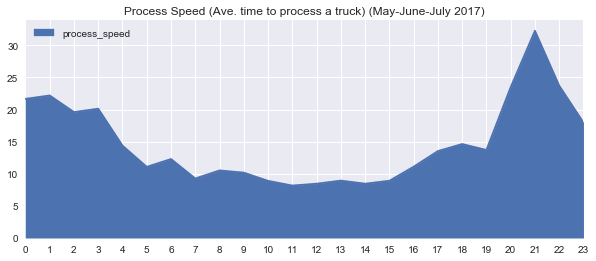

In [164]:
df_process.plot(kind='area', title="Process Speed (Ave. time to process a truck) (May-June-July 2017)", figsize=(10,4), xticks=ticks)

In [165]:
df_process

,process_speed
0,21.666667
1,22.195122
2,19.607843
3,20.134228
4,14.376528
5,11.066667
6,12.286996
7,9.254109
8,10.506512
9,10.165605


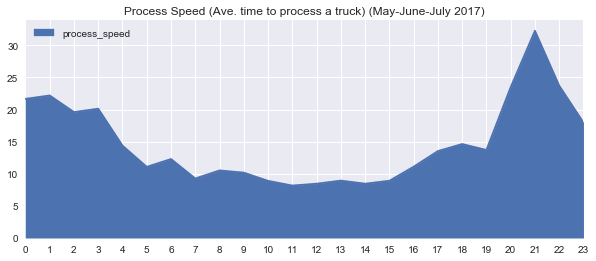

In [166]:
ticks=range(0,24)
df_process.plot(kind='area', title="Process Speed (Ave. time to process a truck) (May-June-July 2017)", figsize=(10,4), xticks=ticks)

the process speed is being slowed considerably between 18:00-22:00... this would lead us think about the staff performance working on that shift..
In addition, there are some quite a low occurences.. but dataset has some lower values (<10 min) and those would be outliers too..
need to be investigated further..

now let's see the occasions of that there is no toher truck in the facility..

In [167]:
temp=[]
for i in range(0,5165):
    if (df.iloc[i]["departure_time"]<=df.iloc[i+1]["Date Time"]) and (df.iloc[i]["trucks_standing"]==1):
        temp.append(df.iloc[i])
        
temp=pd.DataFrame(temp)
temp

,Vehicle,Date Time,total_duration,Date,Time,Arrival Interval,Arrival Interval_min,Year,Month,Day,day_of_week,day_of_week_number,arrival_hour,Exit_within_45_60_min,departure_time,departure_hour,trucks_standing
45,YF63JWC,2017-05-03 18:17:00,94,03.05.2017,18:17:00,0 days 01:28:00.000000000,88,2017,5,3,Wednesday,2,18,Exit after 60 min,2017-05-03 19:51:00,19,1
46,KX14NFH,2017-05-03 21:45:00,62,03.05.2017,21:45:00,0 days 03:28:00.000000000,208,2017,5,3,Wednesday,2,21,Exit after 60 min,2017-05-03 22:47:00,22,1
185,KX66ONZ,2017-05-06 02:29:00,36,06.05.2017,02:29:00,0 days 00:48:00.000000000,48,2017,5,6,Saturday,5,2,Exit within 45 min,2017-05-06 03:05:00,3,1
214,MV64PVU,2017-05-06 15:56:00,10,06.05.2017,15:56:00,0 days 01:24:00.000000000,84,2017,5,6,Saturday,5,15,Exit within 45 min,2017-05-06 16:06:00,16,1
239,PO66VJY,2017-05-07 22:49:00,58,07.05.2017,22:49:00,0 days 01:57:00.000000000,117,2017,5,7,Sunday,6,22,Exit within 45-60 min,2017-05-07 23:47:00,23,1
295,RX66MVE,2017-05-08 20:50:00,48,08.05.2017,20:50:00,0 days 02:32:00.000000000,152,2017,5,8,Monday,0,20,Exit within 45-60 min,2017-05-08 21:38:00,21,1
303,KX14NFV,2017-05-09 01:37:00,29,09.05.2017,01:37:00,0 days 00:48:00.000000000,48,2017,5,9,Tuesday,1,1,Exit within 45 min,2017-05-09 02:06:00,2,1
369,YJ08AGU,2017-05-09 19:36:00,53,09.05.2017,19:36:00,0 days 01:22:00.000000000,82,2017,5,9,Tuesday,1,19,Exit within 45-60 min,2017-05-09 20:29:00,20,1
441,BV63XBN,2017-05-10 18:09:00,44,10.05.2017,18:09:00,0 days 01:49:00.000000000,109,2017,5,10,Wednesday,2,18,Exit within 45 min,2017-05-10 18:53:00,18,1
442,KU11KDJ,2017-05-10 18:54:00,42,10.05.2017,18:54:00,0 days 00:45:00.000000000,45,2017,5,10,Wednesday,2,18,Exit within 45 min,2017-05-10 19:36:00,19,1


In [168]:
temp.shape

(87, 17)

In [169]:
temp.to_csv("single_trucks_in_facility.csv")

In [170]:
df.describe()

,total_duration,Arrival Interval_min,Year,Month,Day,day_of_week_number,arrival_hour,departure_hour,trucks_standing
count,6643.000000,6643.000000,6643.0,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000
mean,76.562698,17.829445,2017.0,6.146922,16.438507,2.458979,10.214361,11.025139,7.414722
std,47.732591,37.526985,0.0,0.834787,8.685041,1.707079,5.222954,5.278067,4.686891
min,0.000000,0.000000,2017.0,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.000000,3.000000,2017.0,5.000000,8.000000,1.000000,6.000000,7.000000,4.000000
50%,71.000000,9.000000,2017.0,6.000000,17.000000,2.000000,10.000000,11.000000,6.000000
75%,99.000000,20.000000,2017.0,7.000000,24.000000,4.000000,13.000000,15.000000,11.000000
max,1169.000000,1087.000000,2017.0,8.000000,31.000000,6.000000,23.000000,23.000000,28.000000


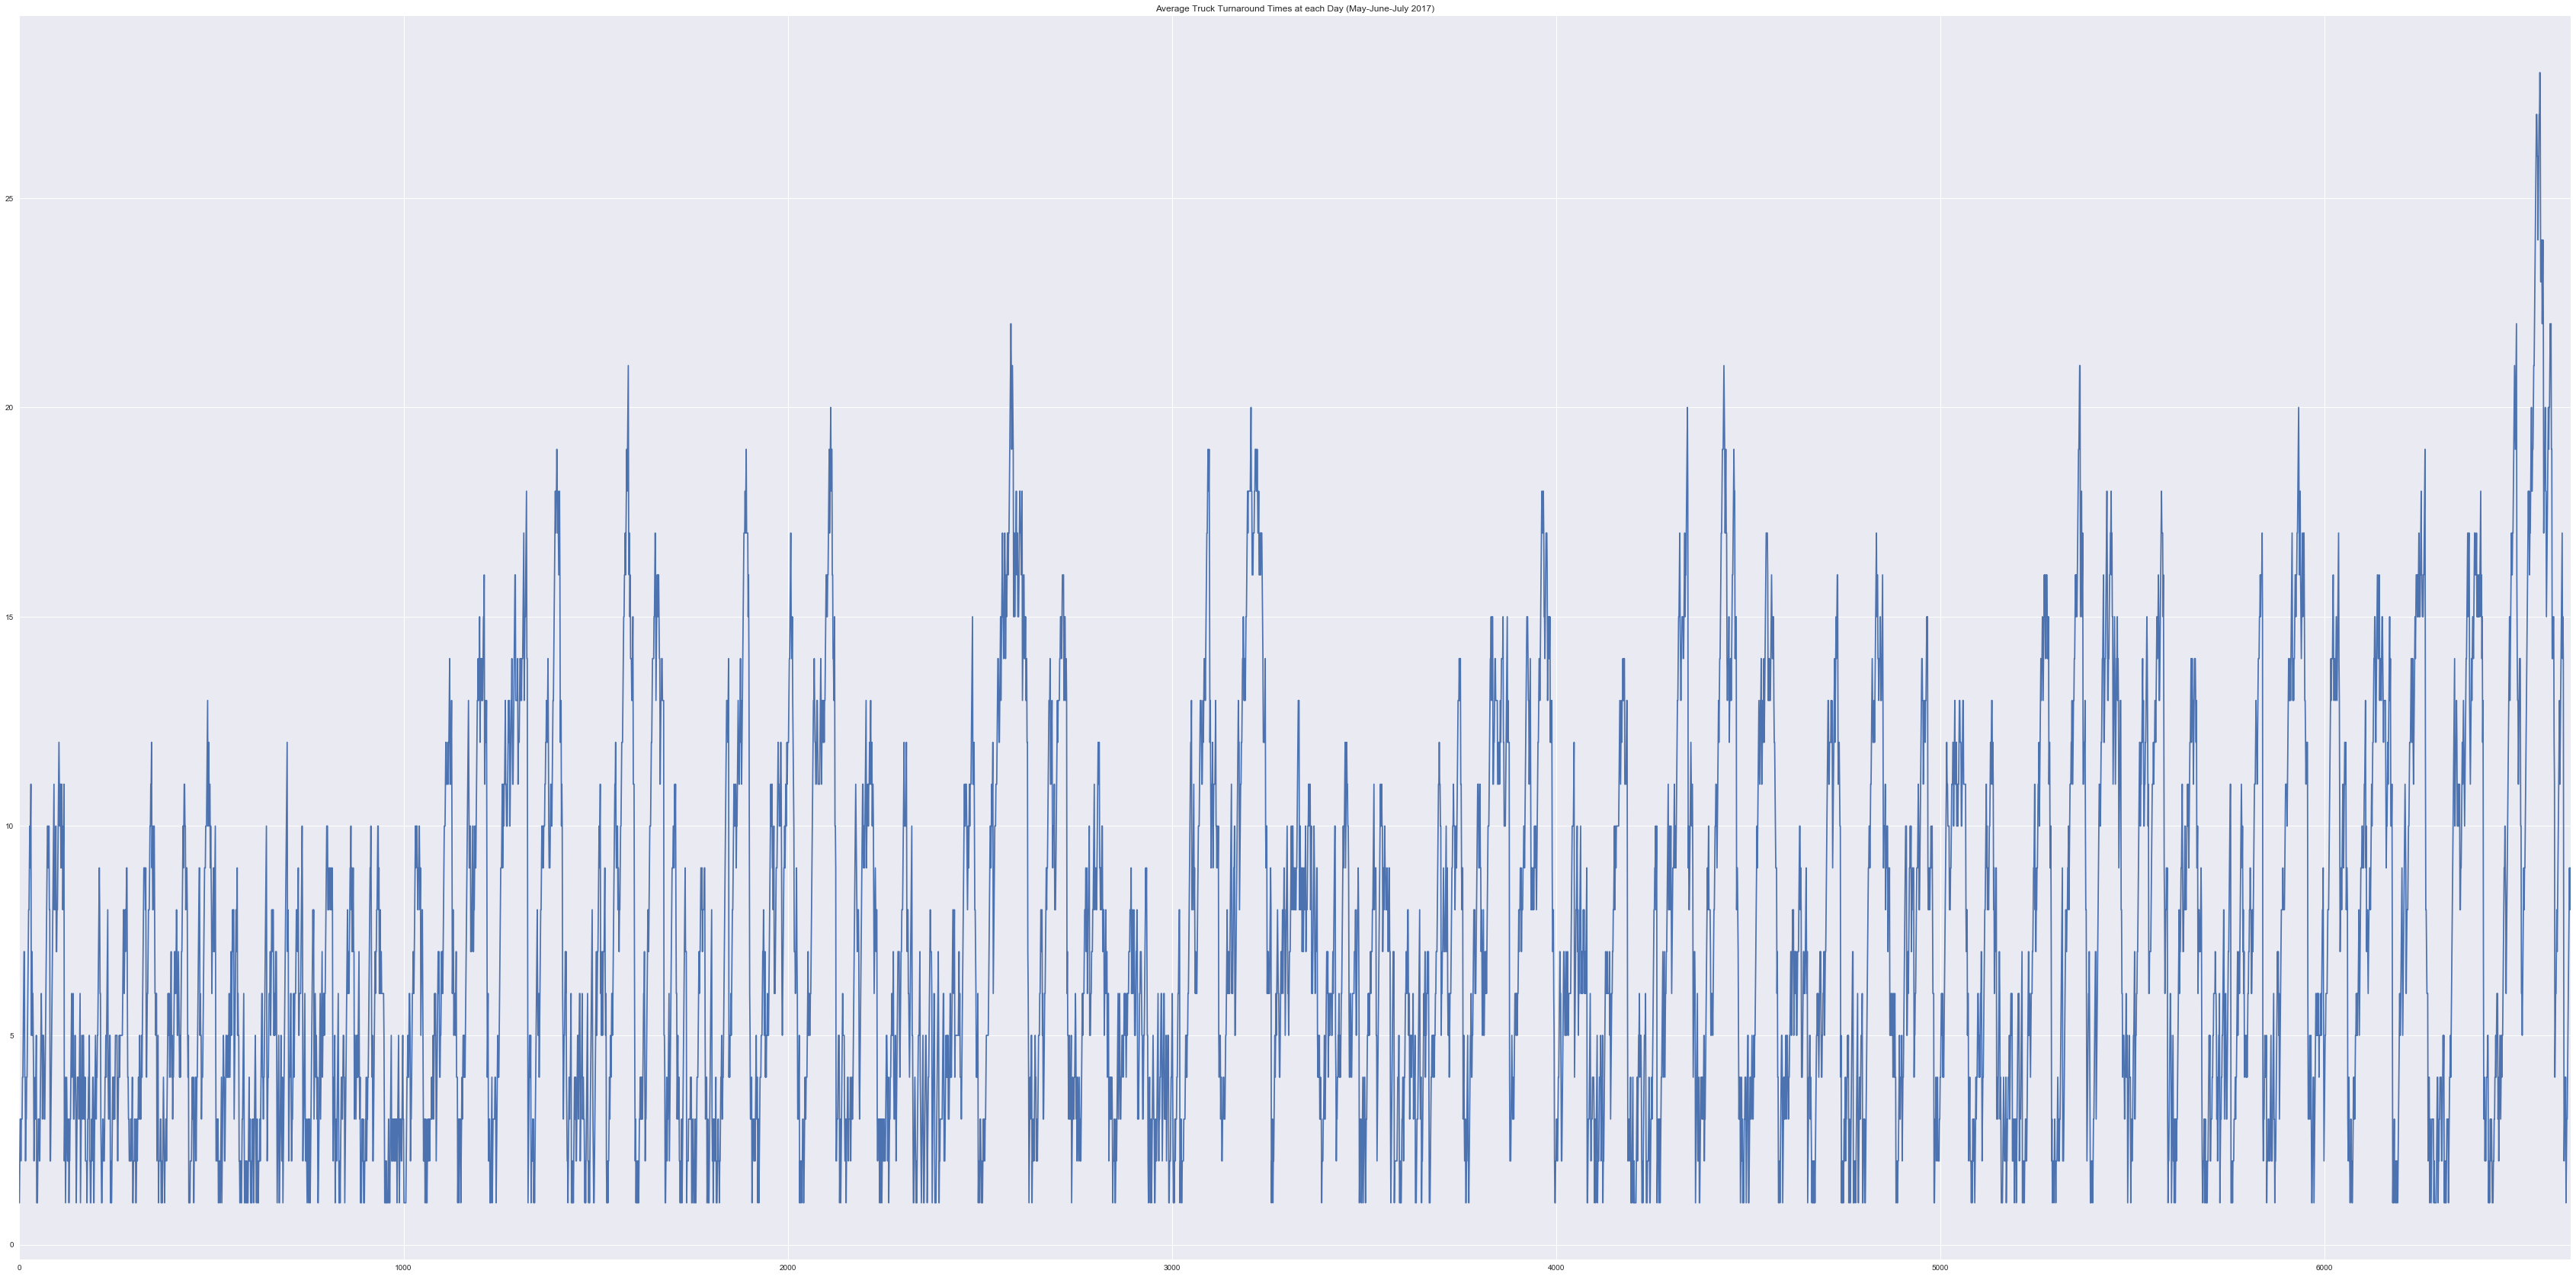

In [171]:
df["trucks_standing"].plot(title="Average Truck Turnaround Times at each Day (May-June-July 2017)", figsize=(60,30))

Now, let’s look at the turnaround times with respect to number of trucks standing at each hour. The x-axis represents the number of trucks standing and y-axis is the average turnaround times (min) (according to dataset, the maximum number of trucks standing in the facility at the same time is 21). We can read this chart like: when the number of trucks standing reaches to 5, the average turnaround time is 72 min at ANPR dataset. On the chart, one can also see the occurence of which the facility runs out of capacity.  
When the standings exceeds 4-5, the line gets steeper.


# proceed from here for report-3

In [172]:
anpr_std_vs_dur=[]
for x in range(1,22):
    anpr_std_vs_dur.append(df_anpr[df_anpr["trucks_standing"]==x]["total_duration"].mean())

df_anpr_std_vs_dur = pd.DataFrame(anpr_std_vs_dur)

df_anpr_std_vs_dur.index = range(1,22)

%matplotlib inline
df_anpr_std_vs_dur.plot(xticks=range(1,22), figsize=(20,12))

NameError: name 'df_anpr' is not defined

In [156]:
df_anpr_std_vs_dur

NameError: name 'df_anpr_std_vs_dur' is not defined

In [61]:
df.groupby(["truck_type"])["total_duration"].mean()

truck_type
B    45.543210
C    48.656566
F    44.080982
L    56.000000
Name: total_duration, dtype: float64

In [62]:
df.groupby(["source"]).size()

source
A       1351
A          1
C        400
C         11
CONT       1
N          1
a          1
dtype: int64

In [63]:
df.groupby(["code"]).size()

code
           1
1       1427
116        3
153        1
3        192
4055       1
574        2
612        1
614        1
662        3
77         3
8         12
C          1
MIX      105
dtype: int64

In [24]:
df["time_in_datetime"]=df.apply(lambda r : pd.datetime.combine(r['Date'],r['time_in']),1)
df["time_out_datetime"]=df.apply(lambda r : pd.datetime.combine(r['Date'],r['time_out']),1)


In [25]:
df.head()

,Date Time,Date,source,code,load_type,quantity,quantity_issued,time_in,time_out,total_duration,truck_type,quantity_avg,Day,trucks_standing,trucks_standing_by_type,load_inside,time_in_datetime,time_out_datetime
0,2017-05-01,2017-05-01,A,1,NaN,390,390,00:48:00,01:28:00,40,F,390.0,1,1,"(0B , 0C , 0F , 0L)",0,2017-05-01 00:48:00,2017-05-01 01:28:00
1,2017-05-01,2017-05-01,C,1,M Checked,364,364,00:55:00,01:59:00,64,C,364.0,1,2,"(0B , 0C , 1F , 0L)",458,2017-05-01 00:55:00,2017-05-01 01:59:00
2,2017-05-01,2017-05-01,A,3,NaN,450,450,01:12:00,02:22:00,70,C,450.0,1,3,"(0B , 1C , 1F , 0L)",834,2017-05-01 01:12:00,2017-05-01 02:22:00
3,2017-05-01,2017-05-01,A,1,NaN,390,520,02:13:00,03:38:00,85,F,455.0,1,2,"(0B , 1C , 0F , 0L)",376,2017-05-01 02:13:00,2017-05-01 03:38:00
4,2017-05-01,2017-05-01,A,1,P's,520,520,02:28:00,05:20:00,172,C,520.0,1,2,"(0B , 0C , 1F , 0L)",458,2017-05-01 02:28:00,2017-05-01 05:20:00


In [26]:
temp=[ ]
temp2=df["time_out_datetime"]
temp3=df["truck_type"]
temp1=[]
temp4=[] #total load

outer_loop=0
inner_loop=0

for x in df["time_in_datetime"]:
    count=1
    count_B=0
    count_C=0
    count_F=0
    count_L=0
    load=0
  
    for y,z in zip(temp2,temp3):   
        
        if inner_loop<outer_loop:
            
            if (y>x):
                count+=1
                
                if z=="F":
                    count_F+=1
                    load+=458
                    
                elif z=="B":
                    count_B+=1
                    load+=250
                    
                elif z=="C":
                    count_C+=1
                    load+=376
                    
                elif z=="L":
                    count_L+=1
                    load+=520
                
            inner_loop+=1  
        else:
            inner_loop=0
            break  # break for inner loop
        
    outer_loop+=1
    count_type=str(count_B)+"B ",str(count_C)+"C ",str(count_F)+"F ",str(count_L)+"L"
    temp.append(count)
    temp1.append(count_type)
    temp4.append(load)

df["trucks_standing"]=temp
df["trucks_standing_by_type"]=temp1
df["load_inside"]=temp4


In [27]:
df.head(100)

,Date Time,Date,source,code,load_type,quantity,quantity_issued,time_in,time_out,total_duration,truck_type,quantity_avg,Day,trucks_standing,trucks_standing_by_type,load_inside,time_in_datetime,time_out_datetime
0,2017-05-01,2017-05-01,A,1,NaN,390,390,00:48:00,01:28:00,40,F,390.0,1,1,"(0B , 0C , 0F , 0L)",0,2017-05-01 00:48:00,2017-05-01 01:28:00
1,2017-05-01,2017-05-01,C,1,M Checked,364,364,00:55:00,01:59:00,64,C,364.0,1,2,"(0B , 0C , 1F , 0L)",458,2017-05-01 00:55:00,2017-05-01 01:59:00
2,2017-05-01,2017-05-01,A,3,NaN,450,450,01:12:00,02:22:00,70,C,450.0,1,3,"(0B , 1C , 1F , 0L)",834,2017-05-01 01:12:00,2017-05-01 02:22:00
3,2017-05-01,2017-05-01,A,1,NaN,390,520,02:13:00,03:38:00,85,F,455.0,1,2,"(0B , 1C , 0F , 0L)",376,2017-05-01 02:13:00,2017-05-01 03:38:00
4,2017-05-01,2017-05-01,A,1,P's,520,520,02:28:00,05:20:00,172,C,520.0,1,2,"(0B , 0C , 1F , 0L)",458,2017-05-01 02:28:00,2017-05-01 05:20:00
5,2017-05-01,2017-05-01,A,MIX,Unpainted,603,603,03:32:00,04:29:00,57,F,603.0,1,3,"(0B , 1C , 1F , 0L)",834,2017-05-01 03:32:00,2017-05-01 04:29:00
6,2017-05-01,2017-05-01,A,MIX,NaN,520,520,04:16:00,05:15:00,59,F,520.0,1,3,"(0B , 1C , 1F , 0L)",834,2017-05-01 04:16:00,2017-05-01 05:15:00
7,2017-05-01,2017-05-01,A,MIX,AI,390,467,04:36:00,05:50:00,74,C,428.5,1,3,"(0B , 1C , 1F , 0L)",834,2017-05-01 04:36:00,2017-05-01 05:50:00
8,2017-05-01,2017-05-01,A,1,AR,520,520,04:48:00,05:45:00,57,F,520.0,1,4,"(0B , 2C , 1F , 0L)",1210,2017-05-01 04:48:00,2017-05-01 05:45:00
9,2017-05-01,2017-05-01,A,1,NaN,48,48,04:55:00,05:11:00,16,F,48.0,1,5,"(0B , 2C , 2F , 0L)",1668,2017-05-01 04:55:00,2017-05-01 05:11:00


In [28]:
df.to_csv("TRT_process_type_load.csv")

In [29]:
df.describe()

,quantity,quantity_issued,total_duration,quantity_avg,Day,trucks_standing,load_inside
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,402.853468,413.074385,46.434004,407.963926,10.049776,4.981544,1620.168904
std,156.729236,148.790936,25.569148,146.157695,5.609198,2.829653,1144.846874
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,375.000000,388.000000,29.000000,377.000000,5.000000,3.000000,752.000000
50%,390.000000,390.000000,42.000000,390.000000,10.000000,5.000000,1419.000000
75%,520.000000,520.000000,59.000000,520.000000,15.000000,7.000000,2376.000000
max,3021.000000,2103.000000,234.000000,2103.000000,19.000000,15.000000,6166.000000


In [154]:
std_vs_dur=[]
for x in range(1,23):
    std_vs_dur.append(df[df["trucks_standing"]==x]["total_duration"].mean())

std_vs_dur

[52.504273504273506,
 58.64459930313589,
 58.64831804281346,
 61.45648604269294,
 64.32377740303541,
 69.05882352941177,
 72.46172839506173,
 79.72380952380952,
 86.7313829787234,
 91.01944444444445,
 95.12052117263843,
 96.62109375,
 101.19702602230483,
 105.10407239819004,
 113.17073170731707,
 119.80451127819549,
 114.45098039215686,
 125.22413793103448,
 113.3103448275862,
 130.9090909090909,
 112.28571428571429,
 142.0]

In [75]:
df[df["trucks_standing"]==22]["day_of_week_number"]

2581    1
6500    4
6547    4
6567    4
6570    4
6588    4
6590    4
Name: day_of_week_number, dtype: int64

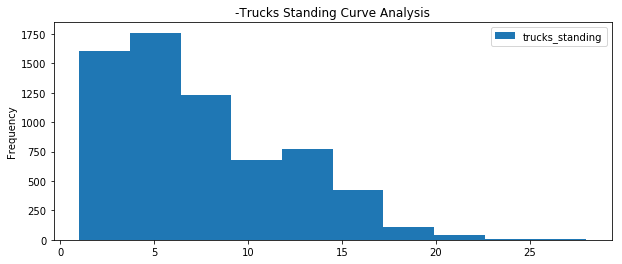

In [76]:
df["trucks_standing"].plot(kind='hist',title="-Trucks Standing Curve Analysis",  legend=True,figsize=(10,4))

c:\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


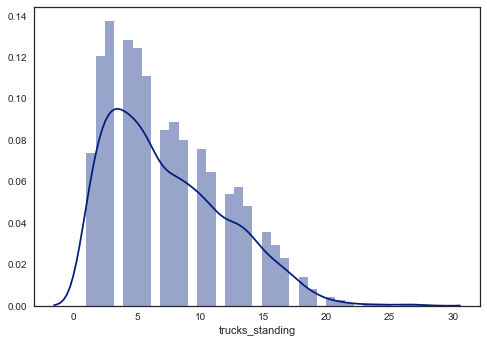

In [86]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white", palette="dark")
sns.distplot(df["trucks_standing"])

IndexError: list index out of range

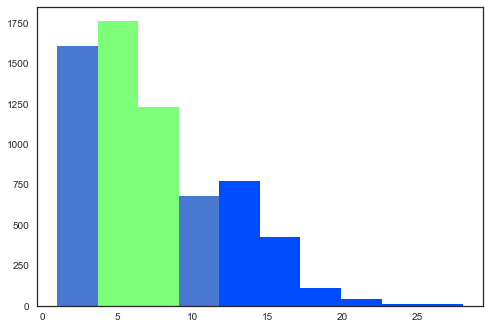

In [81]:
N, bins, patches = plt.hist(df["trucks_standing"])

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)


for i in range(1,3):
    patches[i].set_facecolor(low)
for i in range(4,18):
    patches[i].set_facecolor(medium)
for i in range(22,29):
    patches[i].set_facecolor(high)

plt.xlabel("Trucks Standing", fontsize=16)  
plt.ylabel("Turnaround Times", fontsize=16)
plt.xticks(range(1,29),fontsize=14)  
plt.yticks(fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

In [155]:
df.groupby(['trucks_standing']).size()

trucks_standing
1     351
2     574
3     654
4     609
5     593
6     527
7     405
8     420
9     376
10    360
11    307
12    256
13    269
14    221
15    164
16    133
17    102
18     58
19     29
20     11
21      7
22      1
dtype: int64

In [92]:
df["trucks_standing"].value_counts()

3     666
4     621
5     602
2     583
6     538
8     429
7     412
9     388
10    366
1     358
11    313
13    277
12    262
14    234
15    172
16    141
17    112
18     68
19     40
20     20
21     13
22      7
27      5
24      5
23      4
26      4
25      2
28      1
Name: trucks_standing, dtype: int64

In [45]:
df_std_vs_dur = pd.DataFrame(std_vs_dur)

df_std_vs_dur.index = range(1,29)

# ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']




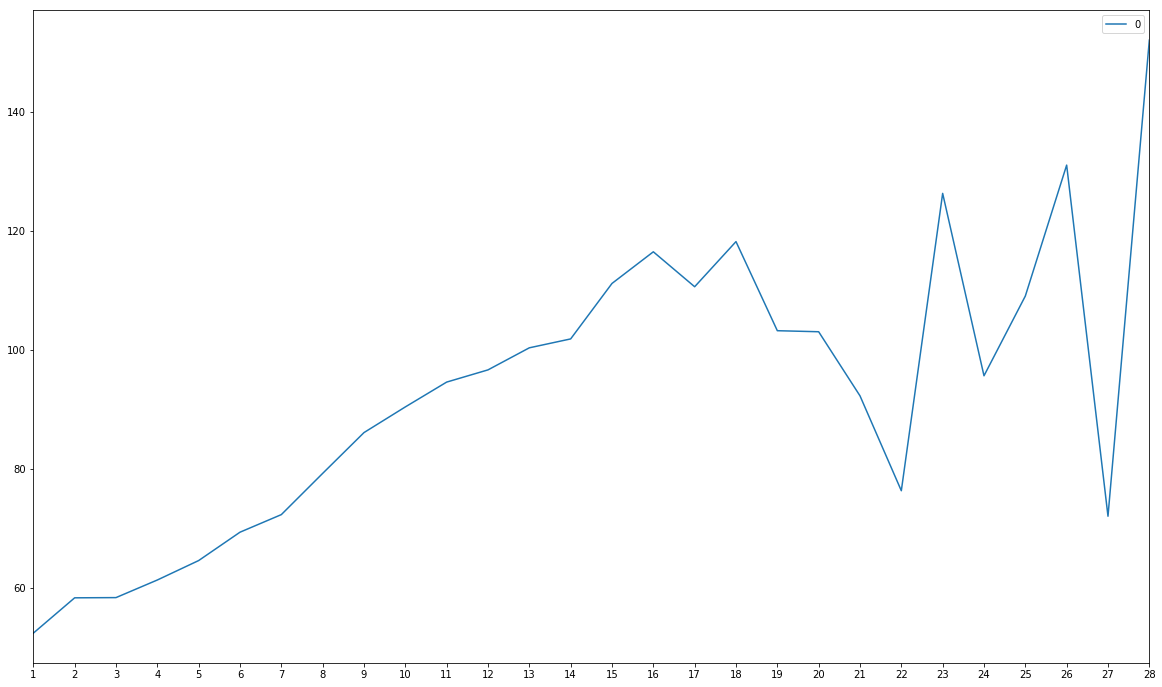

In [48]:

df_std_vs_dur.plot(xticks=range(1,29), figsize=(20,12))

In [40]:
df_std_vs_dur

,0
1,36.407643
2,36.728111
3,40.170635
4,39.334601
5,42.557851
6,47.102857
7,52.746154
8,59.815789
9,63.956989
10,69.555556


In [15]:
import pandas as pd
df_type=pd.read_csv("TRT_process_type_load.csv")

In [5]:
std_vs_load=[]
for x in range(1,16):
    std_vs_load.append(df_type[df_type["trucks_standing"]==x]["load_inside"].mean())

std_vs_load

[0.0,
 406.49769585253455,
 819.6190476190476,
 1241.4220532319391,
 1646.8512396694214,
 2051.885714285714,
 2454.153846153846,
 2819.4736842105262,
 3191.8064516129034,
 3570.3333333333335,
 3988.057142857143,
 4461.684210526316,
 4997.166666666667,
 5494.8,
 5920.0]

In [17]:
import datetime
df_type['Date Time'] = pd.to_datetime(df_type['Date Time'], dayfirst=True)
df_type['time_in_datetime'] = pd.to_datetime(df_type['time_in_datetime'], dayfirst=True)


df_type['day_of_week_number'] = df_type['Date Time'].dt.weekday
df_type['arrival_hour'] = df_type['time_in_datetime'].dt.hourto

In [7]:
arrival_type=[]

for x in range(0,7):
    arrival_type.append(df_type[df_type['day_of_week_number']==x]['truck_type'].value_counts())


df3 = pd.DataFrame(arrival_type)

df3.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']



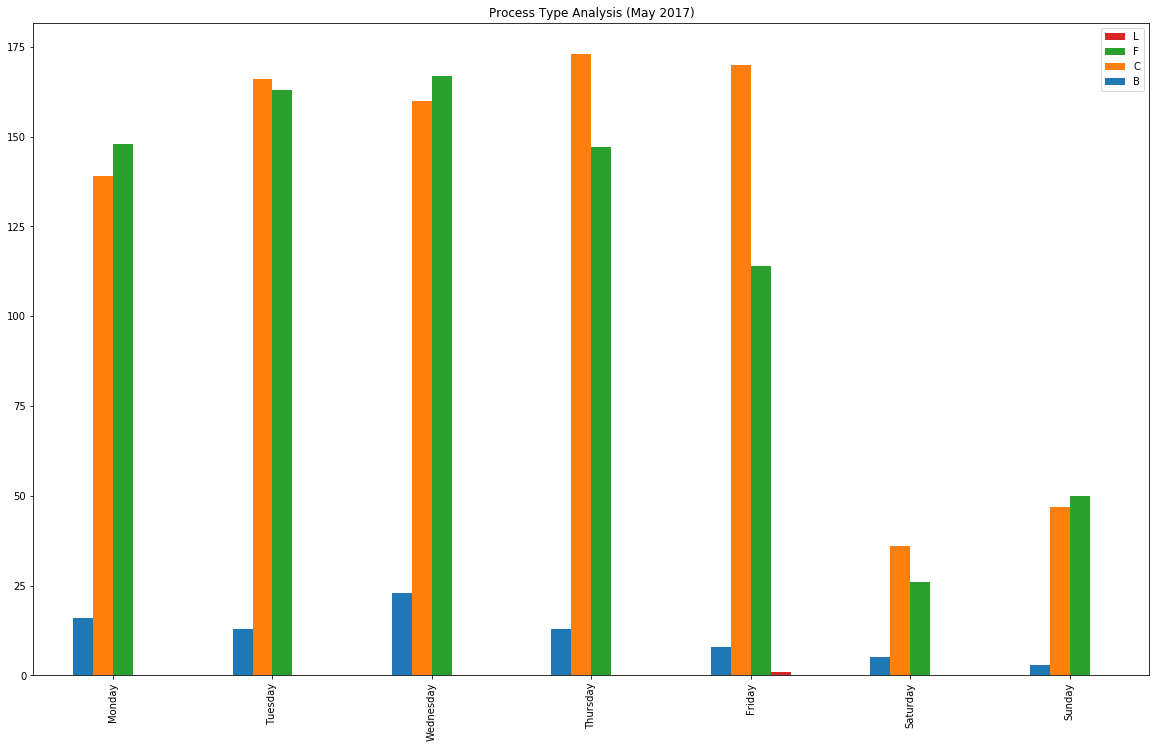

In [9]:
%matplotlib inline

df3.plot(kind='bar', title="Process Type Analysis (May 2017)", sort_columns=True, legend='reverse', figsize=(20,12))

In [10]:
df3

,B,C,F,L
Monday,16.0,139.0,148.0,NaN
Tuesday,13.0,166.0,163.0,NaN
Wednesday,23.0,160.0,167.0,NaN
Thursday,13.0,173.0,147.0,NaN
Friday,8.0,170.0,114.0,1.0
Saturday,5.0,36.0,26.0,NaN
Sunday,3.0,47.0,50.0,NaN


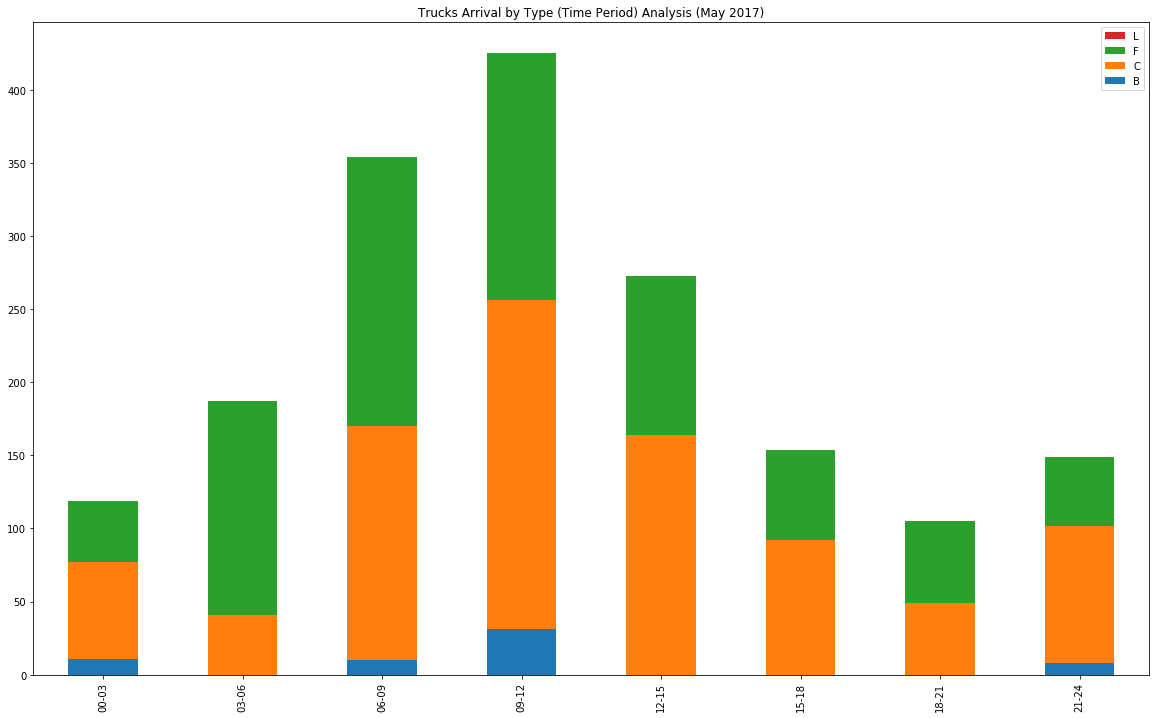

In [21]:
arrival_hour_by_period=[]

a = [0,3,6,9,12,15,18,21]

for x in a:
    arrival_hour_by_period.append(df_type[df_type['arrival_hour']==x]['truck_type'].value_counts()+df_type[df_type['arrival_hour']==(x+1)]['truck_type'].value_counts()+df_type[df_type['arrival_hour']==(x+2)]['truck_type'].value_counts())


df4 = pd.DataFrame(arrival_hour_by_period)

df4.index = ['00-03','03-06','06-09','09-12','12-15','15-18','18-21','21-24']

df4.plot(kind='bar',stacked=True,title="Trucks Arrival by Type (Time Period) Analysis (May 2017)",  legend='reverse',figsize=(20,12))


In [20]:
df4

,B,C,F,L
00-03,11.0,66.0,42.0,NaN
03-06,NaN,41.0,146.0,NaN
06-09,10.0,160.0,184.0,NaN
09-12,31.0,225.0,169.0,NaN
12-15,NaN,164.0,109.0,NaN
15-18,NaN,92.0,62.0,NaN
18-21,NaN,49.0,56.0,NaN
21-24,8.0,94.0,47.0,NaN


In [5]:
import pandas as pd
df_type=pd.read_csv("TRT_vehicle_vs_type.csv", sep=';')

In [6]:
df_type.head()

,VEHICLE,TYPE
0,BW66EJE,C
1,CN60FKD,C
2,GN13MFJ,C
3,YC61YAK,C
4,GN13LZV,C


In [11]:
plates=df_type.VEHICLE.unique()
len(plates)

421

In [12]:
w, h = 500, 500;
v_types = [[0 for x in range(w)] for y in range(h)] 

In [13]:
count=0

for x in plates:
    count_inner=0
    for y,z in zip(df_type.VEHICLE,df_type.TYPE):
        if x==y:
            v_types[count][count_inner]=z
            count_inner+=1  
    count+=1

In [15]:
v_types[0][1]

'F'

In [26]:
types_list=[]

for x in range(0,500):
    types=''
    
    for y in range(0,500):
        
        if v_types[x][y]=='B' or v_types[x][y]=='C' or v_types[x][y]=='F':
            types+="%s" %(v_types[x][y])
            
    types_list.append(types)
    

In [32]:
df_type_list=pd.DataFrame(plates,types_list[0:421])
df_type_list

,0
CFFFFFFFFFFFFFFFFFF,BW66EJE
CFFFFFFFFFF,CN60FKD
CCCCCCCCFCCCCC,GN13MFJ
CCCC,YC61YAK
CCCCCCCCCCCCC,GN13LZV
C,IS68BAN
C,B601XPO
CCCFCCCCCCCCCCC,KX14NGJ
F,KS66XVN
CCCCCCCCCCCCCCCCCCCCCC,BP66KHD


In [34]:
from nltk.tag.stanford import NERTagger

ImportError: cannot import name 'NERTagger'